# AdaBoost

Let us implement the AdaBoost algorithm, to build a powerful emsemble classifier from a set of weaker classifiers. Our base classifier will be a decision stump.

The training algorithm we will implement is as follows. We have $N$ training datapoints and are creating an ensemble of $k$ classifiers.

- Initialize the weights for all datapoints ($w_j = 1/N$ for $j=1,2,...N$)
- For $i = 1$ to $k$
    - Form training set $D_i$ by sampling $N$ tuples (with replacement) from the full training dataset. The sampling probability for a tuple $(x_j,y_j)$ should be given by its corresponding weight $w_j$.
    - Use dataset $D_i$ to fit a decision stump $M_i$. You can use sklearn's DecisionTreeClassifier with max_depth=1 to fit a decision stump.
    - Calculate the error rate for $M_i$ using the sum of the weights of the misclassified points.
    $$err(M_i) = \sum_{j=1}^N w_j * \mathbb{1}\{y_j \ne M_i(x_j)\}$$
    - The weight of classifier $M_i$'s vote is computed as $\alpha_i = 0.5*\log(\frac{1-err(M_i)}{err(M_i)})$
    - Increase the weight of the misclassified training points, and decrease the weight of the correctly classified training points.
    $$w_j \leftarrow w_j * \exp\{- \alpha_i * y_j * M_i(x_j)\}$$
    - Remember to normalize the weights so that they sum to 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")
np.random.seed(1)

Mounted at /content/drive


In [2]:
# Import the libraries / functions that you use in your solution
from sklearn.tree import DecisionTreeClassifier

def train_AdaBoost(X, y, k):
    
    classifiers = []
    alphas = []
    
    ### BEGIN SOLUTION
    
    N = X.shape[0]
    D = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    
    # Initialize weights
    W = np.array([1/N]*N)
    
    for i in range(k):
        # Sample from the dataset according to weights
        indices = np.random.choice(N, N, replace=True, p=W)
        x_sample, y_sample = X[indices], y[indices]
        
        # Fit a decision stump 
        clf = DecisionTreeClassifier(max_depth=1, criterion="entropy", max_features=None)
        clf.fit(x_sample, y_sample)
        y_pred = clf.predict(X)
        
        # Calculate the error rate
        err = np.sum(W[y != y_pred])
        
        # Calculate the weight of classifier's vote
        alpha = 0.5 * np.log((1 - err)/err)
        
        # Increase the weight of misclassified points
        W = W * np.exp(-alpha * y * y_pred)
        
        # normalize the weights
        W /= np.sum(W)
        
        # Append your classifier to the list classifiers
        classifiers.append(clf)
    
        # Append your alpha to the list alphas
        alphas.append(alpha)
        
    ### END SOLUTION
    
    # classifiers and alphas need of be of type <class 'list'>
    return classifiers, alphas

To obtain predictions, the vote of each classifier $M_i$ is weighted by its corresponding coefficient $\alpha_i$.

$$y_i = \text{sign}\{\sum_{i=1}^k \alpha_i*M_i(x_i)\}$$

In [3]:
def predict_AdaBoost(X, classifiers, alphas):
    
    ### BEGIN SOLUTION
    
    # get the predictions for each classifier
    predictions = np.array([clf.predict(X) for clf in classifiers])
    # take a weighted-majority vote
    y_pred = np.sign(np.sum(np.array([pred * a for (pred, a) in zip(predictions, alphas)]), axis=0))
    
    ### END SOLUTION
    
    # y_pred needs to be of type <class 'numpy.ndarray'>
    return y_pred

The below function will help you plot the decision surface given by the algorithm.

In [4]:
def plot_AdaBoost(X, y, classifiers, alphas):
    
    # Get limits of x and y for plotting the decision surface
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Get points at a distance of h between the above limits 
    h = .02    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    # Classify the all the points
    P = predict_AdaBoost(temp, classifiers, alphas).reshape(yy.shape)
    
    # Plot the decision boundary and margin
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.show()

Load the given datasets.

In [5]:
base_path = "/content/drive/MyDrive/PRML/IITM/Question2"
X_train = pd.read_csv(f"{base_path}/X_train.csv", header=None).to_numpy()
X_test = pd.read_csv(f"{base_path}/X_test.csv", header=None).to_numpy()
y_train = pd.read_csv(f"{base_path}/y_train.csv", header=None).to_numpy()[:, 0]
y_test = pd.read_csv(f"{base_path}/y_test.csv", header=None).to_numpy()[:, 0]

Plot the training data as a scatter plot.

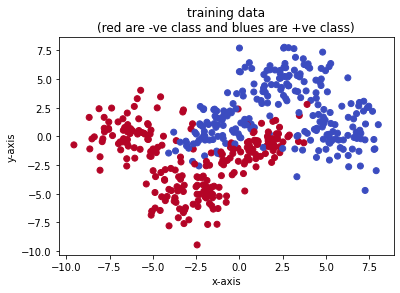

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("training data\n(red are -ve class and blues are +ve class)")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

Use the train_AdaBoost function to train an AdaBoost model with k=5.

In [7]:
classifiers, alphas = train_AdaBoost(X_train, y_train, k=5)

Use the predict_AdaBoost function to make predictions on X_test.

In [8]:
y_pred = predict_AdaBoost(X_test, classifiers, alphas)

Use the plot_AdaBoost function to plot the learnt decision surface.

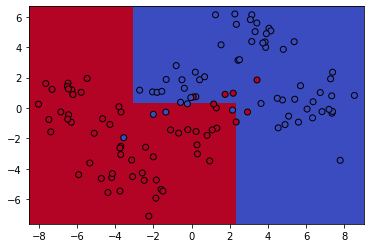

In [9]:
plot_AdaBoost(X_test, y_test, classifiers, alphas)

Compute the accuracy of the predictions on the test set.

In [10]:
print(f"test accuracy for k = 5: {np.sum(y_test == y_pred)/len(y_test): .3f}")

test accuracy for k = 5:  0.917


Use the train_AdaBoost function to train an AdaBoost model with k=100.

In [11]:
classifiers, alphas = train_AdaBoost(X_train, y_train, k=100)

Use the predict_AdaBoost function to make predictions on X_test.

In [12]:
y_pred = predict_AdaBoost(X_test, classifiers, alphas)

Use the plot_AdaBoost function to plot the learnt decision surface.

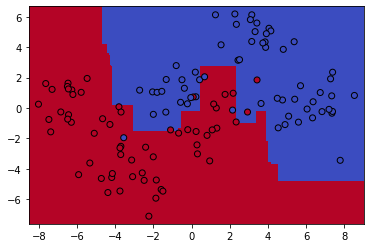

In [13]:
plot_AdaBoost(X_test, y_test, classifiers, alphas)

Compute the accuracy of the predictions on the test set.

In [14]:
print(f"test accuracy for k = 100: {np.sum(y_test == y_pred)/len(y_test): .3f}")

test accuracy for k = 100:  0.942
